In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [221]:
def ft(f, k, xs, dx, q=0):
    result = 0

    for x in xs:
        result += f(x,q) * np.exp(-1j * k * x)

    return result * dx

def g(x, a):
    if np.abs(x) < a:
        return 1/(2*a)
    else:
        return 0

def f(x, q):
    return np.exp(-x**2) * np.exp(-1j*q*x)

def f2d(x, y, q):
    return np.exp(-x**2) * np.exp(-y**2) * np.cos(q*x)**2

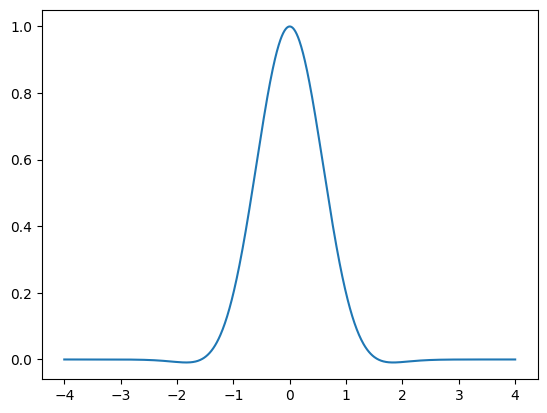

In [224]:
xs = np.linspace(-4, 4, 1000)
dx = xs[1] - xs[0]
plt.imshow( f(xs, 1))

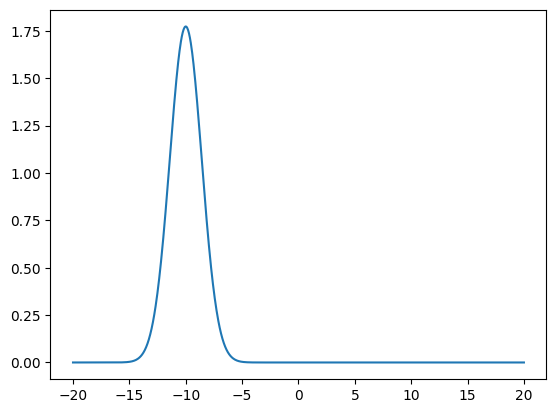

In [225]:
ks = np.linspace(-20,20,1000)

trans = np.array( [ ft(f, k, xs, dx, q=10) for k in ks ])
plt.plot(ks, np.real(trans))

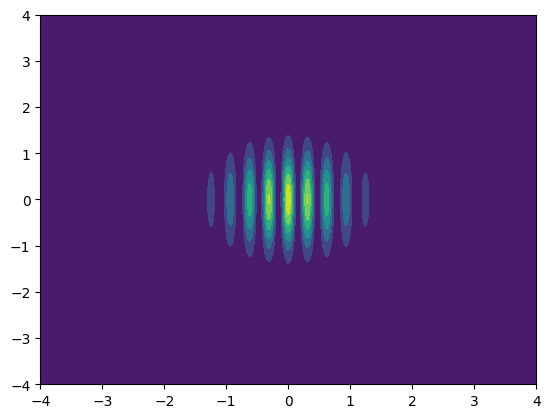

In [176]:
xs = np.linspace(-4, 4, 1000)
ys = np.linspace(-4, 4, 1000)
dx = xs[1] - xs[0]
dy = ys[1] - ys[0]
xg, yg = np.meshgrid(xs,ys)
plt.contourf(xg,yg, f2d(xg, yg, 10))

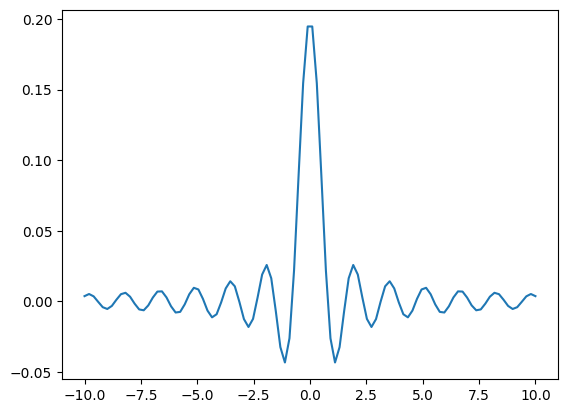

In [191]:
ks = np.linspace(-10,10,100)

trans = np.array( [ ft(g, k, xs, dx, q=20) for k in ks ])
plt.plot(ks, np.real(trans))